# 使用 mplfinance 绘制 数字货币 k 线图

## 说明

- 获取币安交易接口数据, 绘制 k 线图


## Reference

- https://www.grenade.tw/blog/how-to-use-the-python-financial-analysis-visualization-module-mplfinance/

In [1]:
import time
import requests

import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

from talib import abstract
from datetime import datetime

In [2]:
# # DataFrame Setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)
pd.set_option('display.width', 5000)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# # Global Variables Setting
symbol = 'BTCUSDT'
url = 'https://api.binance.com/'

# # Get Market Data
def GetKline(url, symbol, interval, startTime = None, endTime = None):
    try:
        data = requests.get(url + 'api/v3/klines', params={'symbol': symbol, 'interval': interval, 'startTime': startTime, 'limit': 1000}).json()
    except Exception as e:
        print ('Error! problem is {}'.format(e.args[0]))
    tmp  = []
    pair = []
    for base in data:
        tmp  = []
        for i in range(0,6):
            if i == 0:
                base[i] = datetime.fromtimestamp(base[i]/1000)
            tmp.append(base[i])
        pair.append(tmp)
    df = pd.DataFrame(pair, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    df.date = pd.to_datetime(df.date)
    df.set_index("date", inplace=True)
    df = df.astype(float)
    return df

def GetHistoricalKline(url, symbol, interval, startTime):
    # init
    klines = GetKline(url, symbol, interval)
    tmptime = ToMs(klines.iloc[0].name)
    
    # Send request until tmptime > startTime
    while tmptime > startTime:
        tmptime -= PeriodToMs(interval) * 1000 # tmp minus period ms plus 1000 (1000 K)
        if tmptime < startTime:
            tmptime = startTime
        tmpdata = GetKline(url, symbol, interval, tmptime)
        klines  = pd.concat([tmpdata, klines])

    return klines.drop_duplicates(keep='first', inplace=False)

# Math Tools
def ToMs(date):
    return int(time.mktime(time.strptime(str(date), "%Y-%m-%d %H:%M:%S")) * 1000) # Binance timestamp format is 13 digits

def PeriodToMs(period):
    Ms = None
    ToSeconds = {
        "m": 60,
        "h": 60 * 60,
        "d": 24 * 60 * 60,
        "w": 7 * 24 * 60 * 60
    }
    unit = period[-1]

    if unit in ToSeconds:
        try:
            Ms = int(period[:-1]) * ToSeconds[unit] * 1000
        except ValueError:
            pass
    return Ms

In [ ]:

# 4小时线
klines = GetHistoricalKline(url, symbol, '4h', ToMs('2025-01-01 12:00:00'))
print (klines)

                          open       high        low      close        volume
date                                                                         
2024-09-22 08:00:00   63348.97   63450.00   62830.01   63106.00   1863.740010
2024-09-22 12:00:00   63106.00   63200.00   62838.00   62936.00    967.920070
2024-09-22 16:00:00   62936.00   63034.99   62544.94   62784.00   1840.934840
2024-09-22 20:00:00   62784.00   62930.00   62429.16   62652.12   2271.346130
2024-09-23 00:00:00   62652.12   63229.50   62468.01   63160.00   2262.348790
2024-09-23 04:00:00   63160.00   64000.00   62357.93   63578.76   5035.909080
2024-09-23 08:00:00   63578.76   64745.88   62538.75   64354.00   7140.319460
2024-09-23 12:00:00   64354.00   64455.13   63400.00   63548.82   3443.689170
2024-09-23 16:00:00   63548.83   63710.00   63300.00   63435.04   2927.242700
2024-09-23 20:00:00   63435.03   63806.00   63059.93   63618.00   5683.138360
2024-09-24 00:00:00   63617.99   63825.96   63098.97   63298.56 

In [11]:

# 日线
klines = GetKline(url, symbol, '1d', ToMs('2025-01-01 12:00:00'))
print (klines)



                          open       high        low      close        volume
date                                                                         
2025-01-02 08:00:00   94591.78   97839.50   94392.00   96984.79  21970.489480
2025-01-03 08:00:00   96984.79   98976.91   96100.01   98174.18  15253.829360
2025-01-04 08:00:00   98174.17   98778.43   97514.79   98220.50   8990.056510
2025-01-05 08:00:00   98220.51   98836.85   97276.79   98363.61   8095.637230
2025-01-06 08:00:00   98363.61  102480.00   97920.00  102235.60  25263.433750
2025-01-07 08:00:00  102235.60  102724.38   96181.81   96954.61  32059.875370
2025-01-08 08:00:00   96954.60   97268.65   92500.90   95060.61  33704.678940
2025-01-09 08:00:00   95060.61   95382.32   91203.67   92552.49  34544.836850
2025-01-10 08:00:00   92552.49   95836.00   92206.02   94726.11  31482.864240
2025-01-11 08:00:00   94726.10   95050.94   93831.73   94599.99   7047.904300
2025-01-12 08:00:00   94599.99   95450.10   93711.19   94545.06 

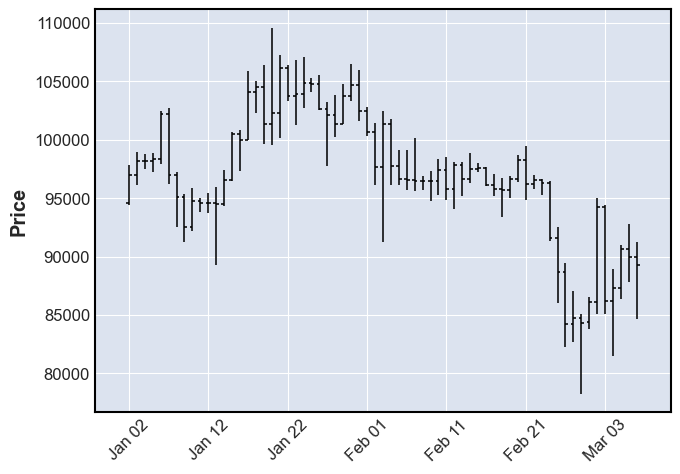

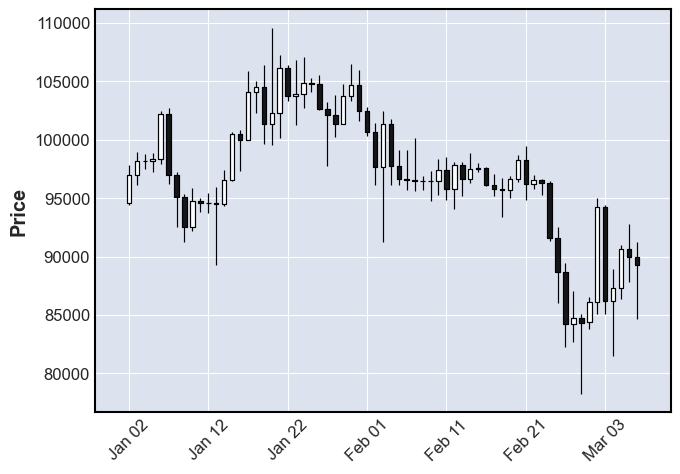

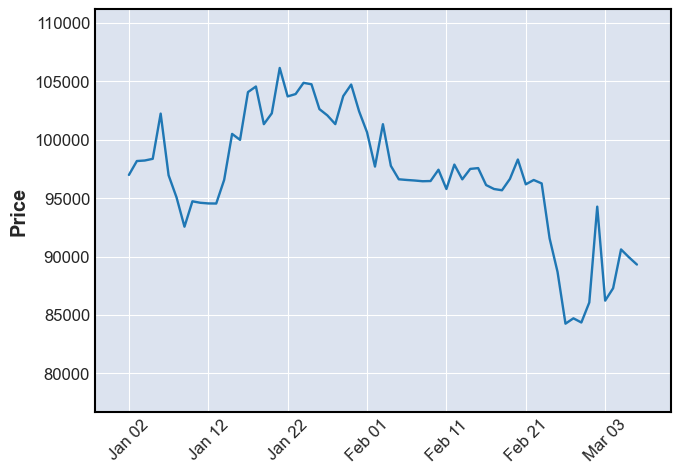

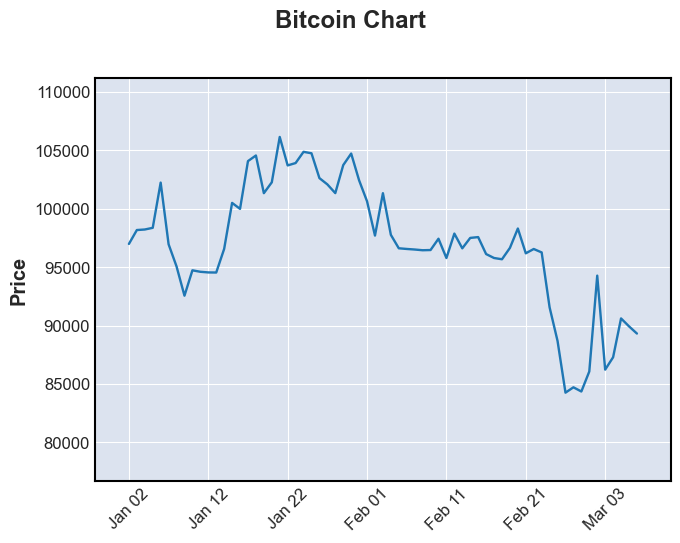

In [13]:

# 绘制日线图
mpf.plot(klines)

# 绘制蜡烛图
mpf.plot(klines, type = 'candle') # 蠟燭圖

# 线图
mpf.plot(klines, type = 'line') # 線圖

mpf.plot(klines, type = 'line', title = 'Bitcoin Chart')

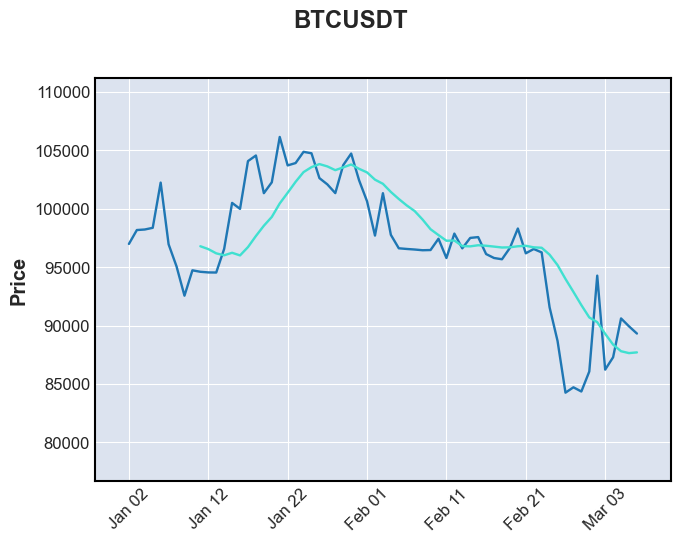

In [14]:
# 單組直接宣告即可
mpf.plot(klines, type = 'line', title = symbol, mav = 10)

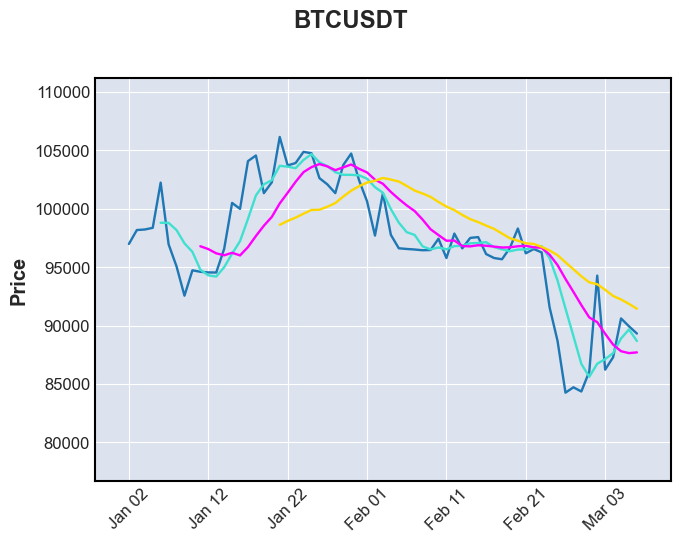

In [15]:
# 多組均線可以利用元組達成
mpf.plot(klines, type = 'line', title = symbol, mav = (5, 10, 20))

In [16]:
# # Financial indicators

def DEMA(df, period):
    return abstract.DEMA(df, timeperiod=period)

def EMA(df, period):
    return abstract.EMA(df, timeperiod=period)

def SMA(df, period):
    return abstract.SMA(df, timeperiod=period)

def RSI(df, period):
    return abstract.RSI(df, timeperiod=period)

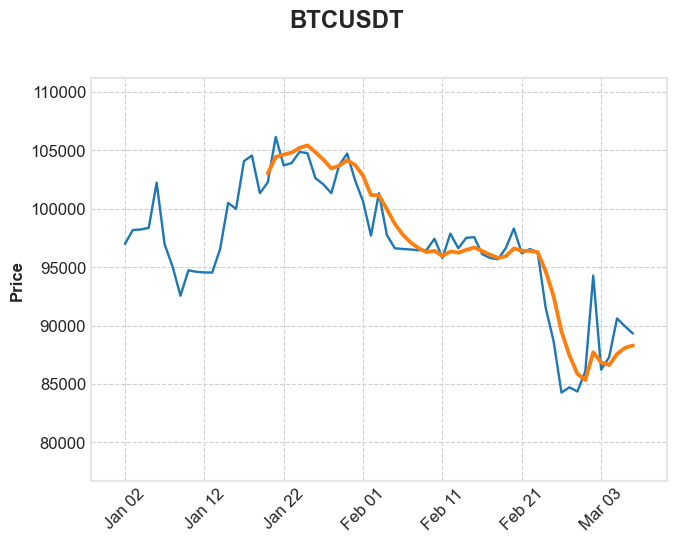

In [33]:

# DEMA 繪製
index  = mpf.make_addplot(DEMA(klines, 10))
mpf.plot(klines, type = 'line', style = 'binance', title = symbol, addplot = [index])

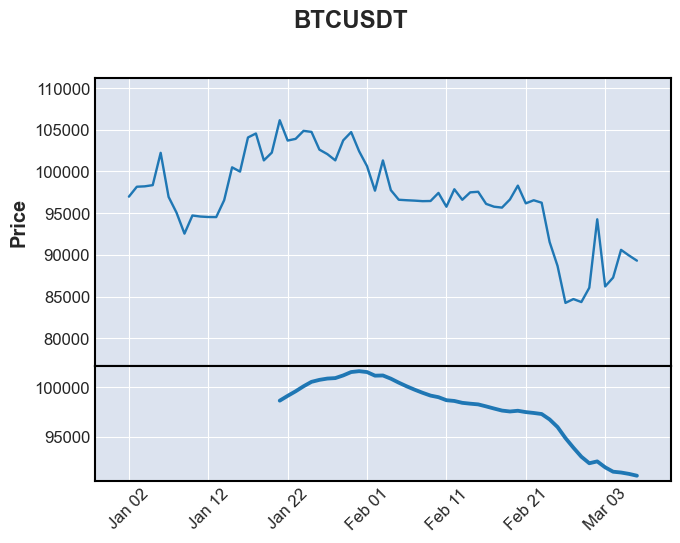

In [18]:

# EMA 繪製 (可以透過 panel 指定繪製區域)
index  = mpf.make_addplot(EMA(klines, 20), panel = 1)
mpf.plot(klines, type = 'line', title = symbol, addplot = [index])

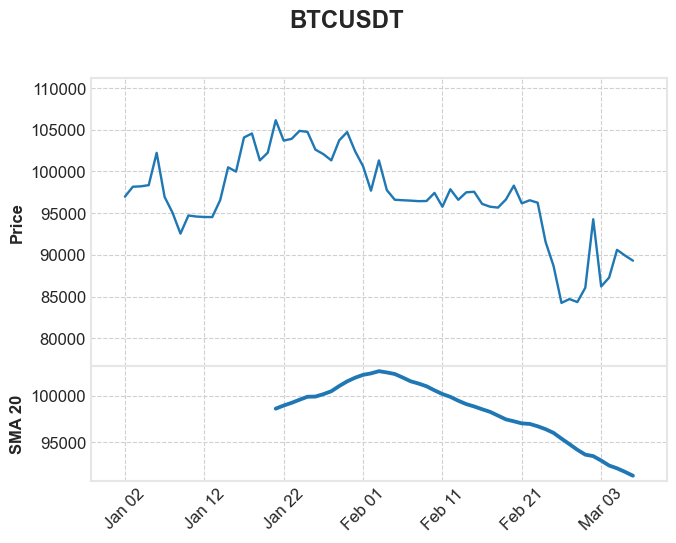

In [ ]:
# SMA 繪製 (可以透過 ylabel 替指標命名)
index  = mpf.make_addplot(SMA(klines, 20), panel = 1, ylabel = 'SMA 20')
mpf.plot(klines, type = 'line', style = 'binance', title = symbol, addplot = [index])


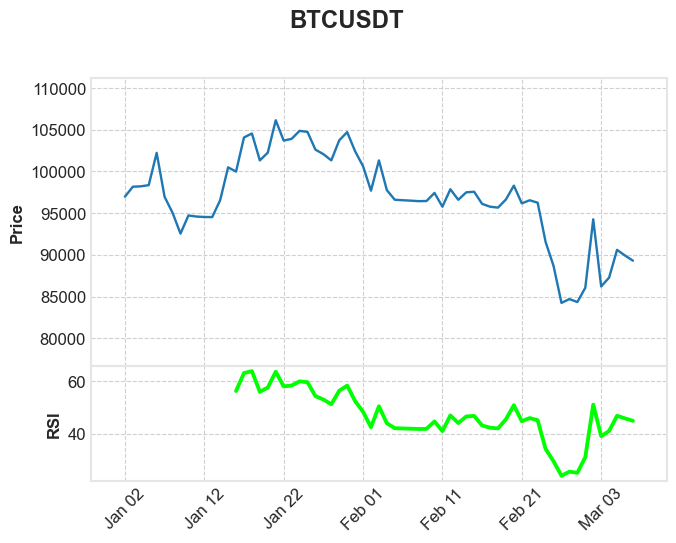

In [31]:
# RSI 繪製 (可以透過 color 指定指標繪製時的顏色)
index  = mpf.make_addplot(RSI(klines, 14), panel = 1, ylabel = 'RSI', color = 'lime')
mpf.plot(klines, type = 'line', style = 'binance', title = symbol, addplot = [index])

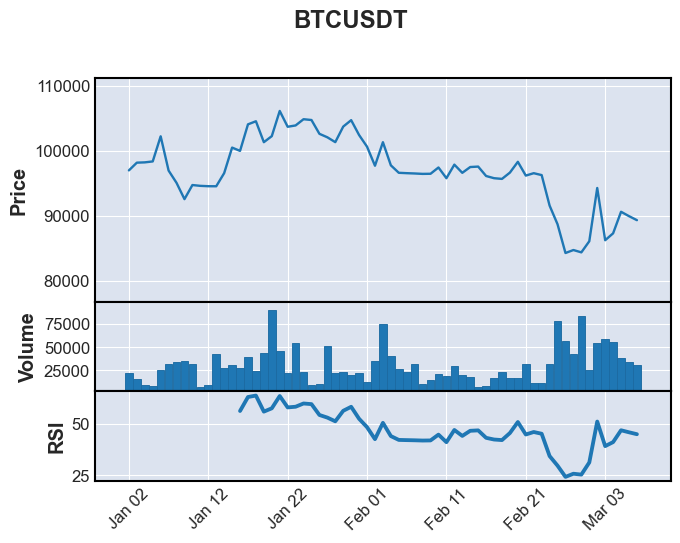

In [21]:

# 增加成交量
index  = mpf.make_addplot(RSI(klines, 14), panel = 2, ylabel = 'RSI')
mpf.plot(klines, type = 'line', title = symbol, addplot = [index], volume = True)

In [22]:
# 可以利用打印輸出所有內建圖表風格
print (mpf.available_styles())

['binance', 'binancedark', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'tradingview', 'yahoo']


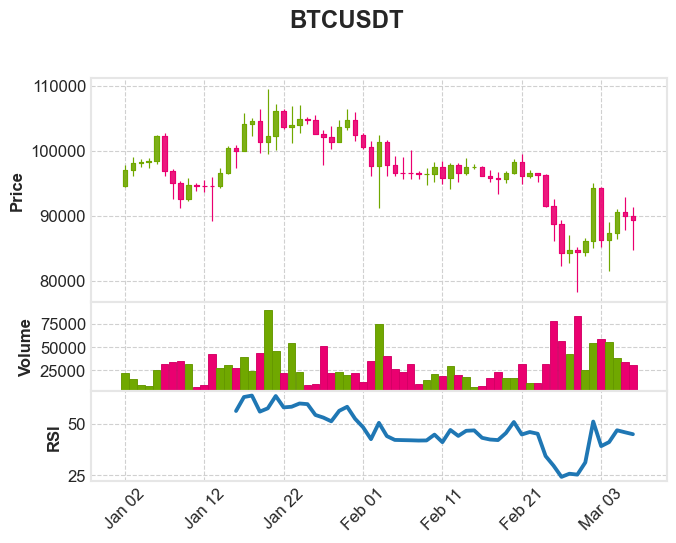

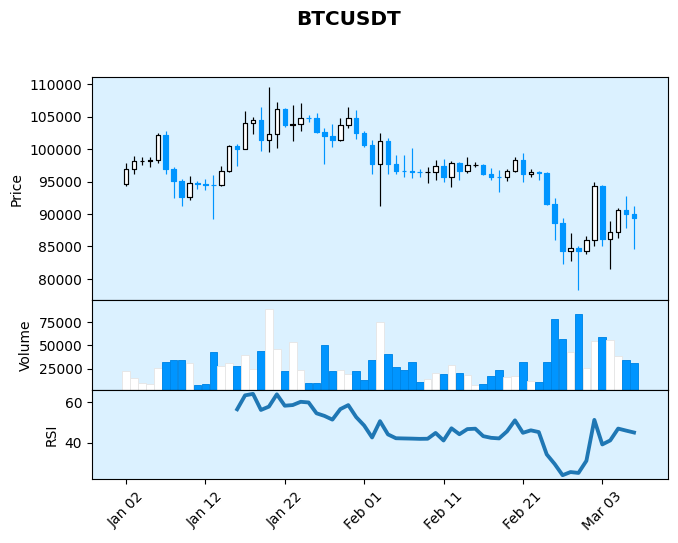

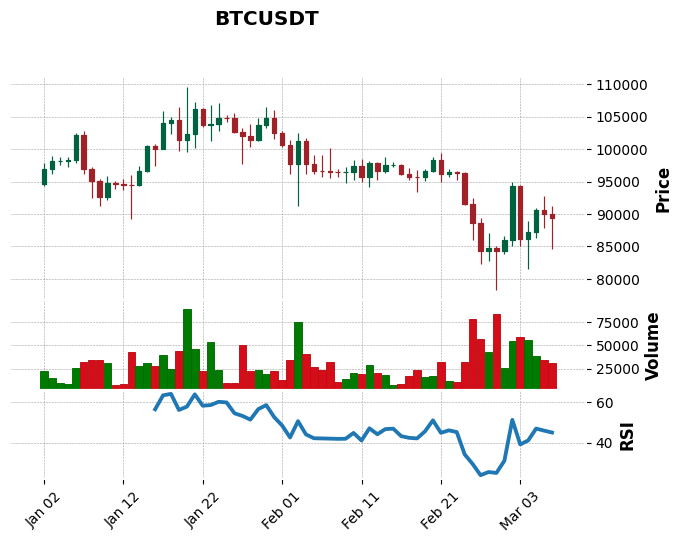

In [29]:

# 币安风格
mpf.plot(klines, type = 'candle', style = 'binance', title = symbol, addplot = [index], volume = True)

mpf.plot(klines, type = 'candle', style = 'blueskies', title = symbol, addplot = [index], volume = True)

mpf.plot(klines, type = 'candle', style = 'charles', title = symbol, addplot = [index], volume = True)

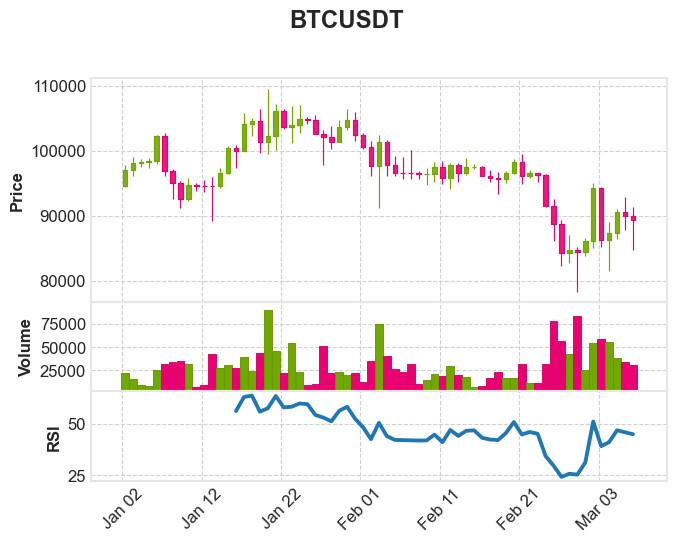

In [30]:
# show_nontrading 參數內建為 False
mpf.plot(klines, type = 'candle', style = 'binance', title = symbol, addplot = [index], volume = True, show_nontrading = True)